In [1]:
pwd

'/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'

In [1]:
from EXP1whiteblackground import display_all_images, clean_experiment_data, calculate_mlae


### Display 6 images

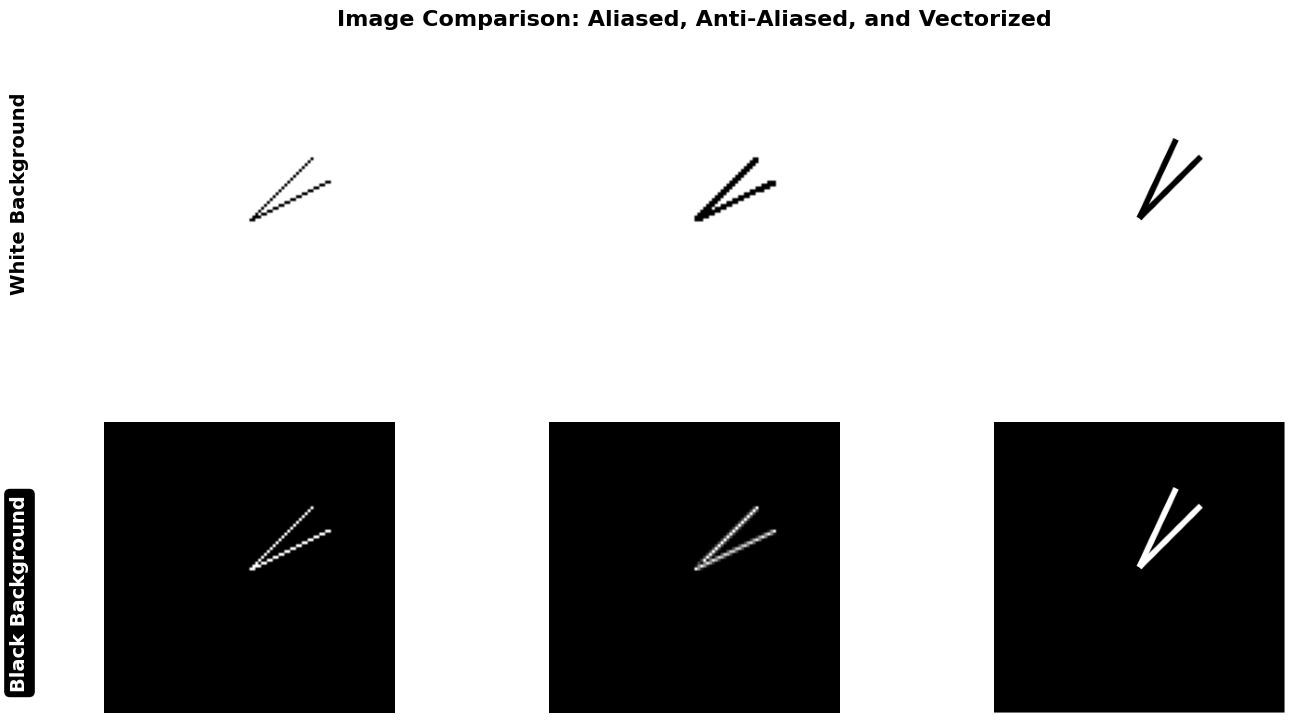

In [3]:
display_all_images("./testdifferenttypeofimages")

### Run experiments and put them into dataframe 

In [ ]:
df = clean_experiment_data("experiment_results.csv")
df

,Model,Answer,Image Name
0,gpt4o,45.0,vectorized_image_white.pdf
1,gpt4o,30.0,antialiased_image_white.png
2,gpt4o,30.0,vectorized_image_black.pdf
3,gpt4o,20.0,aliased_image_black.png
4,gpt4o,45.0,aliased_image_white.png
5,GeminiProVision,25.0,antialiased_image_black.png
6,GeminiProVision,20.0,vectorized_image_white.pdf
7,GeminiProVision,45.0,antialiased_image_white.png
8,GeminiProVision,45.0,vectorized_image_black.pdf
9,GeminiProVision,45.0,aliased_image_black.png


Only Gemini Pro Vision provides nearly accurate answers for row 5 and 6.

### Caculate MLAE and remove 1 NaN value from Llama model

In [8]:
import pandas as pd

ground_truth = 20

results = []

for model in df['Model'].unique(): #group unique models

    model_answers = df[df['Model'] == model]['Answer'].to_numpy() #Filter numbers only
    mlae = calculate_mlae([ground_truth] * len(model_answers), model_answers)
    results.append({"Model": model, "MLAE": mlae})

mlae_df = pd.DataFrame(results)
print(mlae_df)

             Model      MLAE
0            gpt4o  3.820179
1  GeminiProVision  4.139551
2   Gemini1_5Flash  4.651052
3            LLaMA  5.311975
